# Anomaly Detection

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [scipy](https://www.scipy.org/) are used here to test your model with .mat dataset
- [seaborn](https://seaborn.pydata.org/) for plotting graphs in accordance with matplotlib

In [17]:
import scipy.io as sc
from scipy import stats
import numpy as np
import seaborn as sns
import h5py
import matplotlib.pyplot as plt
import math
import matplotlib.mlab as mlab
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
from sklearn.cluster import DBSCAN

## Loading the dataset
 Following code module loads the data ,the data is in matplot io format so it is necessary to use scipy.io to load the data
 in correct format the whole data is divided in following format
 train data
 cross validation 

In [18]:
Small_data_set = sc.loadmat('ex8data1.mat')
Large_data_set = sc.loadmat('ex8data2.mat')
small_data = Small_data_set['X']
xval=Small_data_set['Xval']
yval=Small_data_set['yval']
small_data = np.array(small_data)
xval= np.array(xval)
yval=np.array(yval)
large_data_x = Large_data_set['X']
#large_data_y = Large_data_set['Y

large_data_xval = Large_data_set['Xval']
large_data_yval = Large_data_set['yval']
large_data = np.array(large_data)

## DBSCAN (Density based spatial clustering of applications with noise)
This algorithm was proposed by martin ester in 1996 the goal of this algorithm is very simple as to group all nearby points in a cluster 

## Working

There are following parameters which needs to be evaluated in order to run properly
* epsilon => the radius of hypersphere in which we look for points
* minpts => the minimum number of points which needs to be present in the epsilon
* core => the point in around which the cluster is formed
* border => the points which are not core points but lie inside the cluster of the core points
* noise points => which are not the part of any cluster
* Density edge => direct edge connecting two points of same cluster
* Density connected points => path between two points of same cluster

### Abstract Algorithm 

The DBSCAN algorithm can be break in three steps:
   * Find the epsilon neighbour of each point and identify the core points with more than minpts neighbour
   * Find the connected components of core points on the neighbour graph , ignoring all non core points.
   * Assign each non-core point to a nearby cluster if the cluster is an epsilon , otherwise assign it to noise

#### KD Tree visualization (2d)

![alt text](2dkdtree.png "2d Visualization of kdtree")

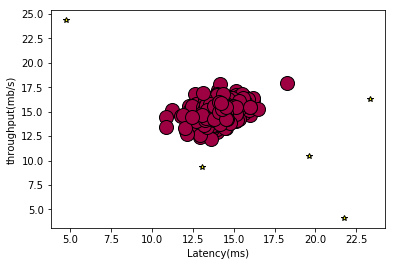

In [10]:
db = DBSCAN(eps=2.9,min_samples=5,metric='euclidean',algorithm='kd_tree').fit(small_data)
core_mask = np.zeros_like(db.labels_,dtype=bool)
def a(ac):
    return ac-2
    
core_mask[db.core_sample_indices_]=True
labels= db.labels_
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0,1,len(unique_labels))]
for k ,col in zip(unique_labels,colors):
    if k==-1:
        col=[1,1,0,1]
    class_member_mask = (labels == k)
    xy = small_data[class_member_mask & core_mask]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor=tuple(col),markeredgecolor='k',markersize=14)
    
    xy = small_data[class_member_mask & ~core_mask]
    plt.plot(xy[:,0],xy[:,1],'*',markerfacecolor=tuple(col),markeredgecolor='k',markersize=6)
plt.xlabel('Latency(ms)')
plt.ylabel('throughput(mb/s)')
plt.show()
    

In [11]:
print(db)

DBSCAN(algorithm='kd_tree', eps=2.9, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)


In [12]:
anomaly = small_data[labels == -1]

In [66]:
print(anomaly)

[[13.07931049  9.34787812]
 [21.72713402  4.12623222]
 [19.58257277 10.411619  ]
 [23.33986753 16.29887355]
 [ 4.75261282 24.35040725]]


In [67]:
ac =0
for i in range(0,307):
    if(yval[i]==1):
        ac=ac+1
ac=a(ac)
print("Actual anomaly:=>",ac)

Actual anomaly:=> 7


In [68]:
print("Predicted anomaly:=>",len(anomaly))
print("Accuracy :=>",100*len(anomaly)/ac)

Predicted anomaly:=> 5
Accuracy :=> 71.42857142857143


## Application of DBSCAN over Large dataset 

In [30]:
db = DBSCAN(eps=5,min_samples=5,metric='euclidean',algorithm='kd_tree').fit(large_data_xval)
core_mask = np.zeros_like(db.labels_,dtype=bool)
def a(ac):
    return ac-2
    
core_mask[db.core_sample_indices_]=True
labels= db.labels_
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0,1,len(unique_labels))]
for k ,col in zip(unique_labels,colors):
    if k==-1:
        col=[1,1,0,1]
    class_member_mask = (labels == k)
    xy = large_data_xval[class_member_mask & core_mask]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor=tuple(col),markeredgecolor='k',markersize=14)
    
    xy = large_data_xval[class_member_mask & ~core_mask]

In [31]:
anomaly = large_data_xval[labels == -1]
print(len(anomaly))

100
